# Finance Data Project 

An evaluation of the bank stocks throughout the financial crisis from early 2006 to late 2015.
In this data project we will focus on exploratory data analysis of stock prices. 


In [3]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns

In [6]:
df=pd.read_pickle('all_banks.pkl')
df

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

** Finding the max closing price per bank**

In [7]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Creating a new DataFrame called returns, that will contain the returns for each bank's stock. (the difference with the day before) **

In [8]:
returns = pd.DataFrame()
returns

""


In [9]:
returns = df.loc[:,(slice(None),'Close')].pct_change()
returns.columns = ['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return']
returns


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


** A pairplot of the returns dataframe. **

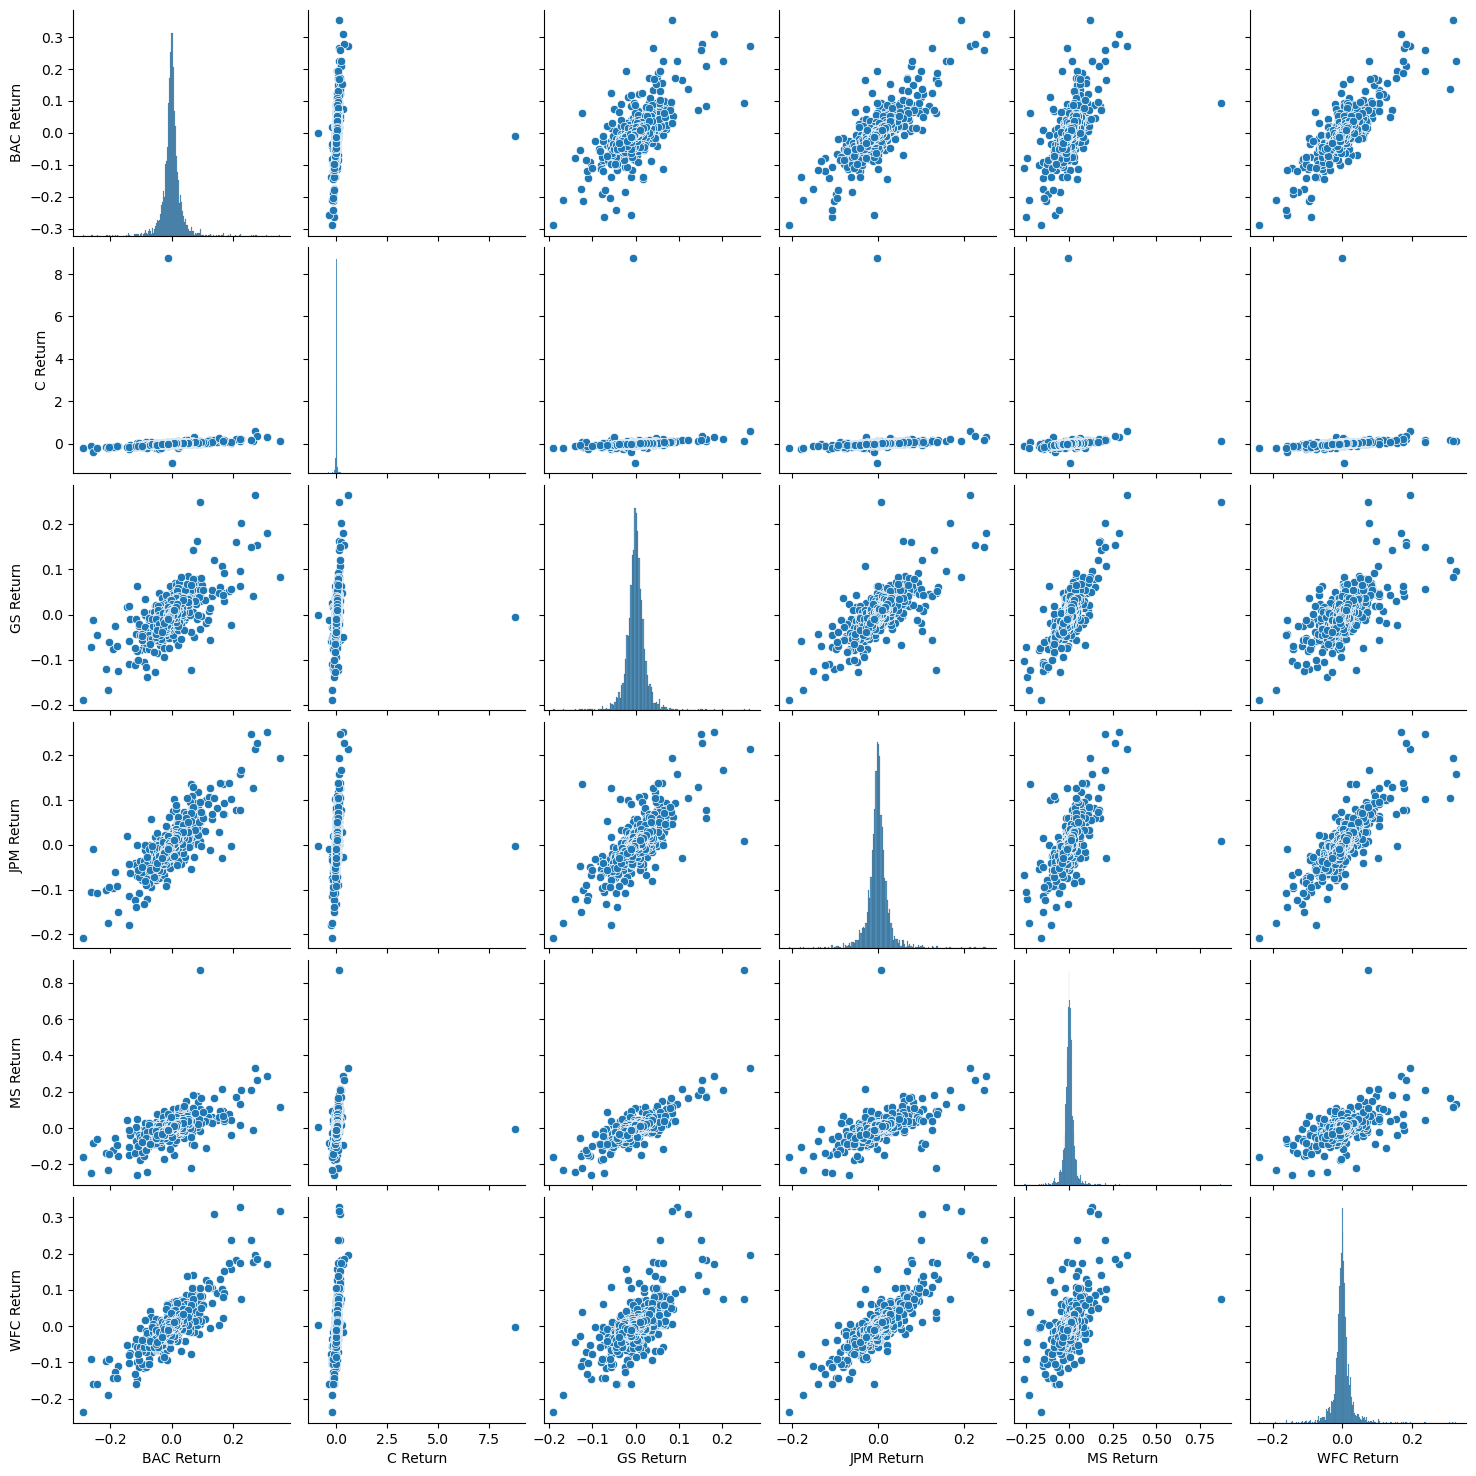

In [10]:
sns.pairplot(returns)

** What was for each bank the best and worst single day returns **

In [11]:
returns.idxmin()


BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [12]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Determining the riskiest stock over the entire time period using standard deviation **

In [13]:
np.std(returns)
## C return is riskiest

BAC Return    0.036643
C Return      0.179933
GS Return     0.025341
JPM Return    0.027651
MS Return     0.037813
WFC Return    0.030227
dtype: float64

** Determining the riskiest stock for the year 2015 using standard deviation **

In [14]:
timeframe = returns.loc['2015-01-01':'2015-12-31']
np.std(timeframe)


BAC Return    0.016130
C Return      0.015259
GS Return     0.014019
JPM Return    0.013989
MS Return     0.016217
WFC Return    0.012566
dtype: float64

** A distplot of the 2015 returns for Morgan Stanley **

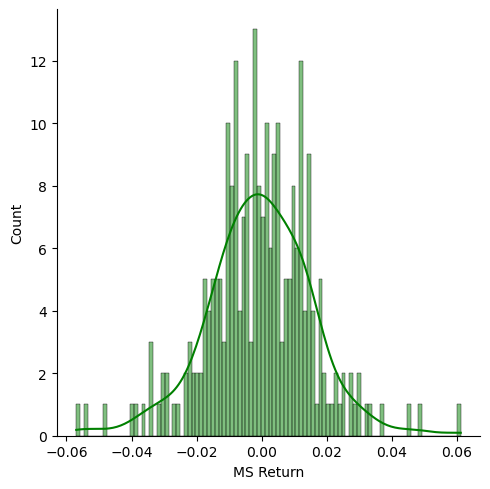

In [15]:
sns.displot(timeframe, x='MS Return', kde = True, color = 'green', bins = 100)

** Aa distplot of the 2008 returns for CitiGroup **

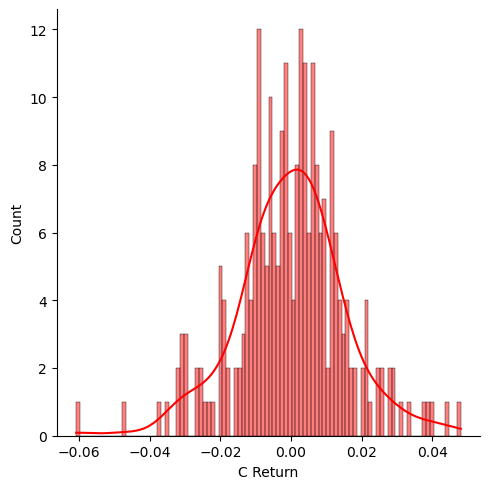

In [16]:
timeframe2 = returns.loc['2008-01-01':'2008-12-31']
sns.displot(timeframe, x='C Return', kde = True, color = 'red', bins = 100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** A line plot showing Close price for each bank for the entire index of time. **

<Axes: xlabel='Date'>

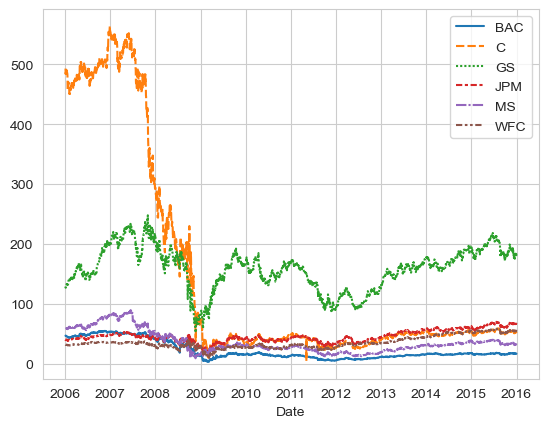

In [18]:
ClosePrice = df.xs(key = 'Close', level='Stock Info', drop_level=False, axis=1)
sns.lineplot(ClosePrice)
## sns.lineplot(data=df,x='Date',y='Close')

 ** A plot of the rolling 30 day average for Bank Of America's stock for the year 2008 **

Text(0.5, 1.0, 'Rolling 30 day average for Bank of America')

<Figure size 1200x600 with 0 Axes>

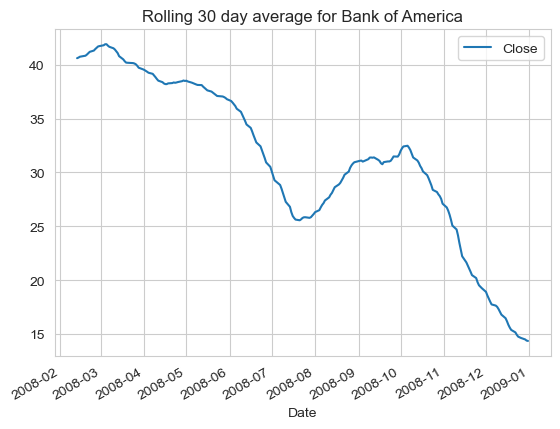

In [24]:
plt.figure(figsize=(12,6))
ClosePrice['BAC'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()
plt.title('Rolling 30 day average for Bank of America')

** A heatmap of the correlation between the stocks Close Price. **

<Axes: xlabel='Bank Ticker-Stock Info', ylabel='Bank Ticker-Stock Info'>

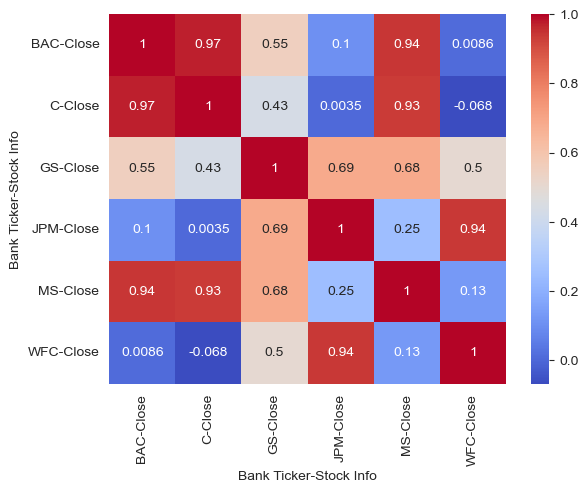

In [26]:
corr = ClosePrice.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

** A clustermap of the correlation **

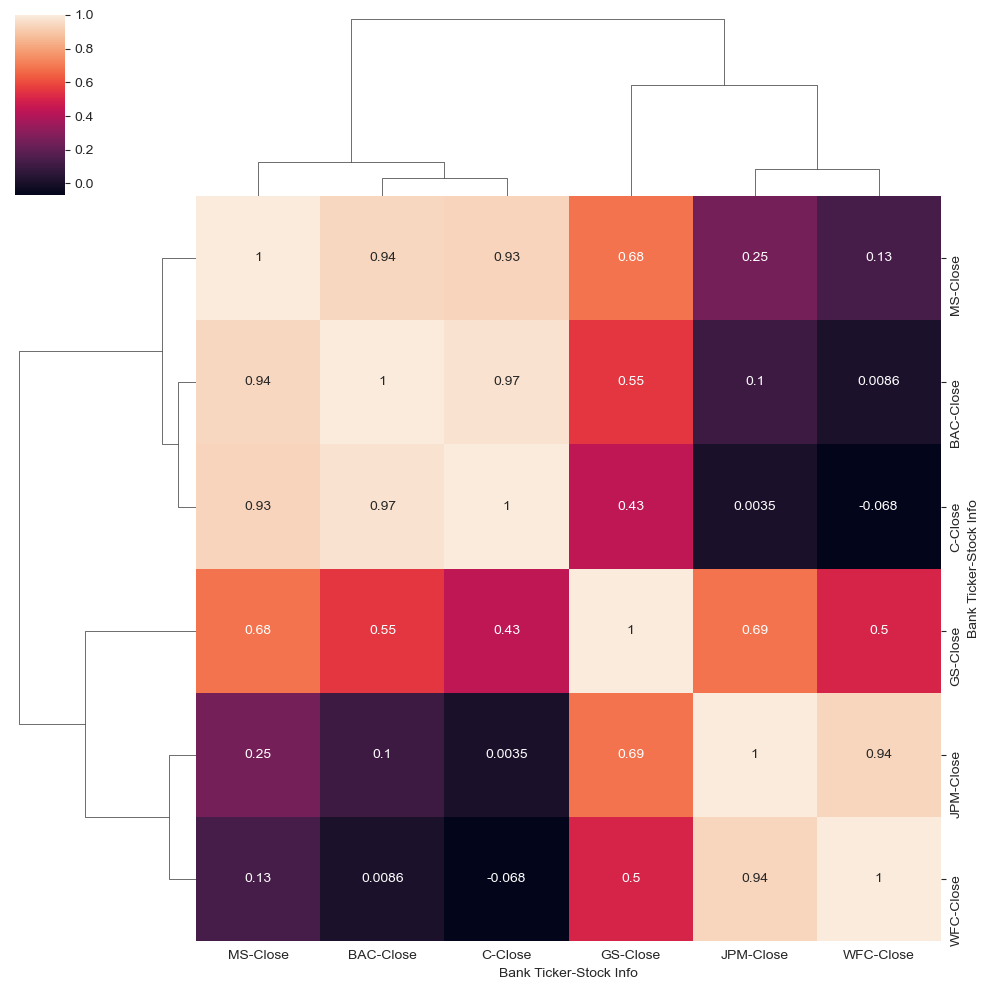

In [27]:
sns.clustermap(corr, annot=True)